<a href="https://colab.research.google.com/github/jonahsjlee/programming/blob/main/theBootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1.1** - The probability of getting a 1



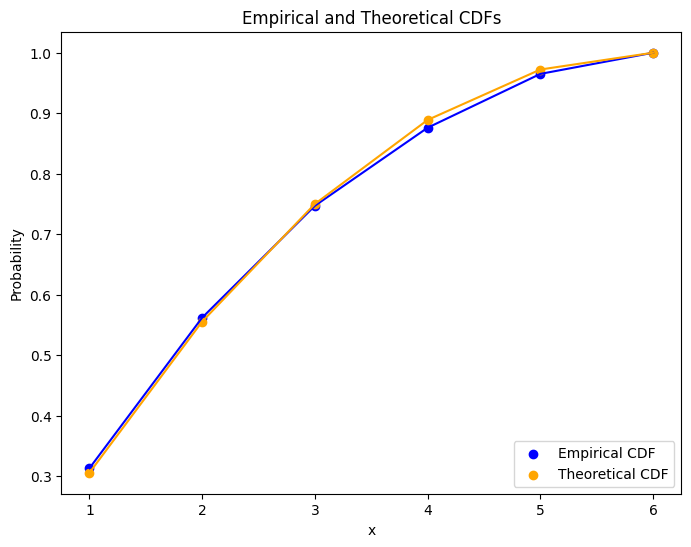

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# set up dice faces and initialize probability distribution
dice_faces = np.arange(1, 7)
probability_distribution = np.zeros(len(dice_faces))

# calculate the PDF by iterating through all possible outcomes
for die1 in dice_faces:
    for die2 in dice_faces:
        minimum_value = min(die1, die2)
        probability_distribution[minimum_value - 1] += 1
probability_distribution /= 36  # Normalize to get probabilities
cumulative_distribution = np.cumsum(probability_distribution)

# perform bootstrap simulation to estimate the empirical CDF
num_simulations = 1000
rolls_die1 = np.random.choice(dice_faces, size=num_simulations)
rolls_die2 = np.random.choice(dice_faces, size=num_simulations)
minimum_rolls = np.minimum(rolls_die1, rolls_die2)

empirical_cdf = np.array([
    np.sum(minimum_rolls <= face) / num_simulations for face in dice_faces
])

# plot the theoretical and empirical CDFs for comparison
plt.figure(figsize=(8, 6))
plt.scatter(dice_faces, empirical_cdf, label='Empirical CDF', color='blue')
plt.plot(dice_faces, empirical_cdf, color='blue')
plt.scatter(dice_faces, cumulative_distribution, label='Theoretical CDF', color='orange')
plt.plot(dice_faces, cumulative_distribution, color='orange')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDFs')
plt.show()

Expected value (Median): 3.4822


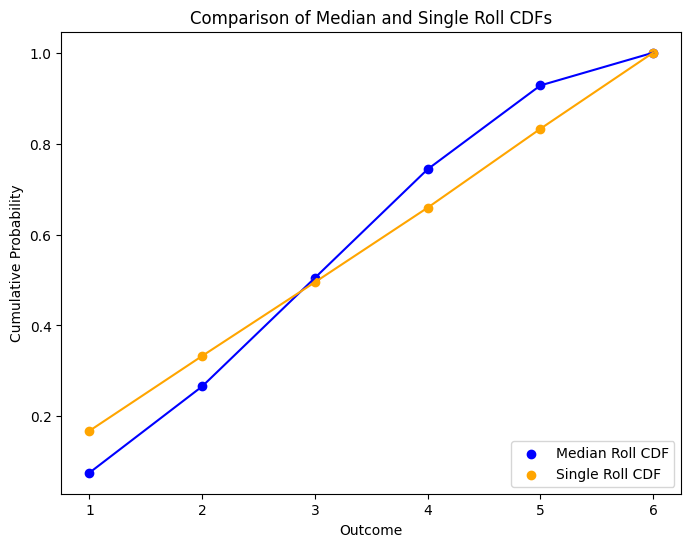

In [3]:
#Q1.2

import numpy as np
import matplotlib.pyplot as plt

dice_faces = np.arange(1, 7)
num_simulations = 5000

roll_die1 = np.random.choice(dice_faces, size=num_simulations)
roll_die2 = np.random.choice(dice_faces, size=num_simulations)
roll_die3 = np.random.choice(dice_faces, size=num_simulations)

median_rolls = np.median(np.array([roll_die1, roll_die2, roll_die3]), axis=0).astype(int)

expected_value_median = np.mean(median_rolls)
print('Expected value (Median):', expected_value_median)

empirical_cdf_median = np.array([
    np.sum(median_rolls <= face) / num_simulations for face in dice_faces
])

empirical_cdf_single = np.array([
    np.sum(roll_die1 <= face) / num_simulations for face in dice_faces
])

plt.figure(figsize=(8, 6))
plt.scatter(dice_faces, empirical_cdf_median, label='Median Roll CDF', color='blue')
plt.plot(dice_faces, empirical_cdf_median, color='blue')
plt.scatter(dice_faces, empirical_cdf_single, label='Single Roll CDF', color='orange')
plt.plot(dice_faces, empirical_cdf_single, color='orange')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDFs')
plt.show()

                Sum
count  50000.000000
mean       4.171800
std        3.228773
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       35.000000


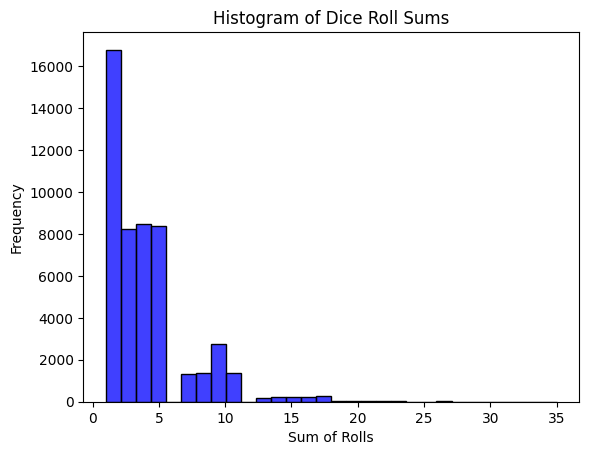

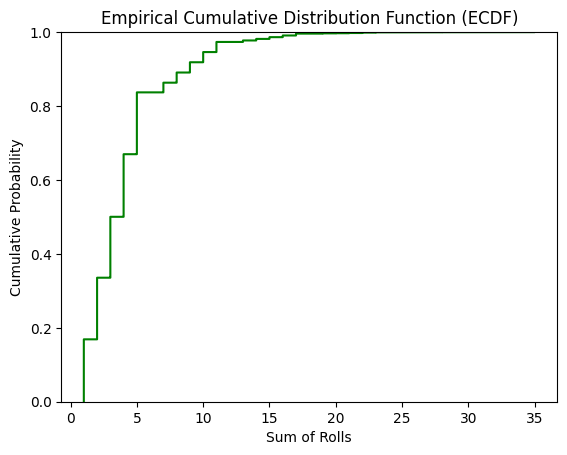

In [4]:
#Q1.3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dice_faces = np.arange(1, 7)
num_trials = 50000

roll_sums = []
for _ in range(num_trials):
    current_sum = 0
    while True:
        roll = np.random.choice(dice_faces)
        current_sum += roll
        if roll < 6:
            roll_sums.append(current_sum)
            break

roll_sums_df = pd.DataFrame(roll_sums, columns=['Sum'])

print(roll_sums_df.describe())

sns.histplot(roll_sums_df, x='Sum', bins=30, kde=False, color='blue')
plt.title('Histogram of Dice Roll Sums')
plt.xlabel('Sum of Rolls')
plt.ylabel('Frequency')
plt.show()

sns.ecdfplot(roll_sums_df, x='Sum', color='green')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.xlabel('Sum of Rolls')
plt.ylabel('Cumulative Probability')
plt.show()


Q2

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 

Raw treatment effect: 0.00011505110015985753


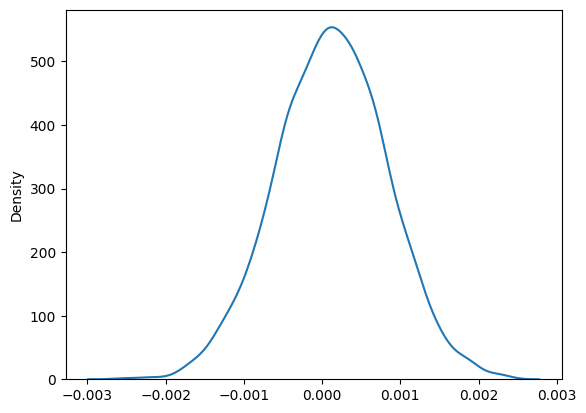

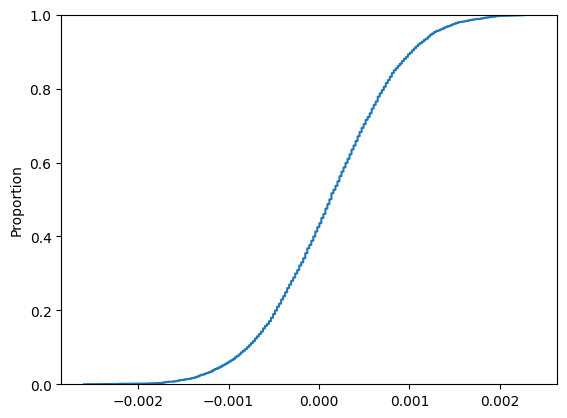

99% confidence interval: (-0.0017103922183078551, 0.0019406280191620589)


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sample_data/mammogram.csv')

# Q1: treatment effect
print(pd.crosstab(df['treatment'], df['breast_cancer_death']), '\n')
print(pd.crosstab(df['treatment'], df['breast_cancer_death'], margins=True, normalize=True), '\n')

raw_effect = 44425/44925 - 44405/44910
print(f'Raw treatment effect: {raw_effect}')

# Q2: boostrapping
df['survive'] = (df['breast_cancer_death'] == 'no').astype(int)
df_treat = df[df['treatment'] == 'mammogram']
df_control = df[df['treatment'] == 'control']

S = 5000
fx = [np.mean(df_treat.sample(n=len(df_treat), replace=True)['survive']) -
      np.mean(df_control.sample(n=len(df_control), replace=True)['survive'])
      for _ in range(S)]

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

# Q3: confidence interval
lower, upper = np.quantile(fx, [0.005, 0.995])
print(f'99% confidence interval: ({lower}, {upper})')


Getting a mammogram does not lead to a statistically significant difference in 25-year survival rates, as indicated by the 99% confidence interval, which includes zero. However, this is just a statistics exercise and is not a valid argument against the routine diagnostic use of mammograms or their subsidization. If mammograms were not assigned at random, there may be selection bias at play, as those who are healthier and wealthier may be more likely to undergo mammograms. This might make mammograms seem less effective by reducing the incidence of breast cancer in the therapy group. Mammograms may be very helpful for some high-risk subpopulations, but they may not be very successful at lowering breast cancer mortality at the general level. Furthermore, death is the only topic of this investigation. By identifying breast cancer early, mammograms may also improve quality of life, among other advantages. For example, survival rates may be similar between groups, but chemotherapy may have been administered less frequently to individuals who had mammograms. This type of analysis can help determine the efficacy of therapies, by looking at the distribution of treatment effects.

